In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

keras = tf.keras
models = tf.keras.models
layers = tf.keras.layers

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 1s 0us/step


In [6]:
data_dir

'./datasets/flower_photos'

In [7]:
import pathlib #makes it easier to work with the images e.g going through all the directories and select all images with .jpg extension etc.
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [9]:
img_count = len(list(data_dir.glob('*/*.jpg')))
img_count

3670

In [11]:
roses = list(data_dir.glob('roses/*'))
roses

[PosixPath('datasets/flower_photos/roses/15104537437_f6730b38c3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16316557109_7fc55c1cbc_m.jpg'),
 PosixPath('datasets/flower_photos/roses/1788484468_f73afa6c32_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6347847065_83cf87333b_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14381787252_e8e12e277a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15498482197_8878cdfb07_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3179751458_9646d839f6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17702388233_f29dc14834_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15255964454_0a64eb67fa.jpg'),
 PosixPath('datasets/flower_photos/roses/3713368809_eba7fa2fbf_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4921988677_e2eb0c9a24_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6363976189_e7155e

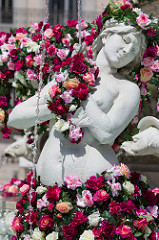

In [16]:

PIL.Image.open(str(roses[9]))

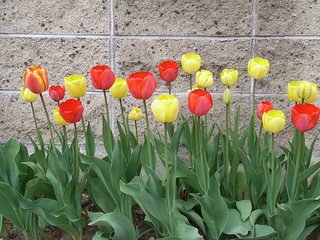

In [17]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

Read flowers images from disk into numpy array using opencv


In [18]:

flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [19]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

Open Cv converts file path to numpy array


array([[[  0,  12,  30],
        [  6,  17,  31],
        [  2,  11,  21],
        ...,
        [  1,   6,  21],
        [  4,  11,  28],
        [  2,   9,  28]],

       [[  0,  10,  24],
        [  0,   6,  16],
        [ 14,  18,  23],
        ...,
        [  9,  16,  25],
        [  0,   7,  17],
        [  4,  12,  25]],

       [[  4,  13,  23],
        [ 12,  16,  21],
        [ 90,  92,  93],
        ...,
        [108, 115, 118],
        [ 23,  32,  36],
        [  1,   9,  16]],

       ...,

       [[  0,   7,  17],
        [ 10,  14,  25],
        [115, 116, 126],
        ...,
        [160, 163, 171],
        [ 32,  37,  46],
        [  6,  11,  20]],

       [[  3,  15,  25],
        [  0,   6,  17],
        [ 28,  30,  40],
        ...,
        [ 33,  38,  47],
        [  0,   4,  15],
        [  8,  14,  25]],

       [[  0,  12,  22],
        [  5,  14,  24],
        [  3,   8,  17],
        ...,
        [ 10,  15,  24],
        [  7,  13,  24],
        [  3,  11,  24]]], dtype=uint8)
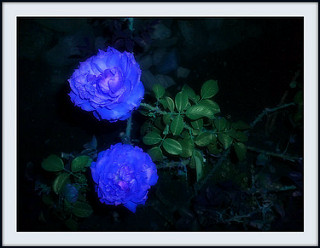

In [23]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

In [24]:
img.shape

(248, 320, 3)

Resize the images
> Add blockquote



In [26]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [27]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [28]:
X = np.array(X)
y = np.array(y)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [30]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [31]:

num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 9s 25ms/step - loss: 1.3339 - accuracy: 0.4222
Epoch 2/30
86/86 [==============================] - 2s 22ms/step - loss: 1.0006 - accuracy: 0.6014
Epoch 3/30
86/86 [==============================] - 2s 21ms/step - loss: 0.8119 - accuracy: 0.6922
Epoch 4/30
86/86 [==============================] - 2s 22ms/step - loss: 0.6334 - accuracy: 0.7638
Epoch 5/30
86/86 [==============================] - 2s 21ms/step - loss: 0.4477 - accuracy: 0.8427
Epoch 6/30
86/86 [==============================] - 2s 21ms/step - loss: 0.2838 - accuracy: 0.9095
Epoch 7/30
86/86 [==============================] - 2s 22ms/step - loss: 0.1783 - accuracy: 0.9437
Epoch 8/30
86/86 [==============================] - 2s 24ms/step - loss: 0.0847 - accuracy: 0.9764
Epoch 9/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0398 - accuracy: 0.9924
Epoch 10/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0460 - accuracy: 0.9866
Epoch 11/

In [32]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 1s 21ms/step - loss: 3.1187 - accuracy: 0.6329


[3.118696451187134, 0.6328976154327393]

In [33]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 0s 11ms/step


array([[ 12.977444 ,  17.995413 , -17.92077  , -12.258576 ,   9.554503 ],
       [ 32.197918 , -24.685106 , -40.566074 ,  -4.902044 ,  15.888796 ],
       [ -1.2081491,  -2.5194468,  10.176228 ,  -8.331415 ,   0.5921685],
       ...,
       [ -1.5619203,  -1.0522289,  -1.1367875,   9.609549 ,  -0.6984231],
       [  7.620413 ,   1.2606435,  -1.0485831,  -7.8399057,  -1.3354331],
       [ -3.5018363, -19.459541 ,   2.7435195,  29.944267 ,  -0.8303525]],
      dtype=float32)

In [34]:

score = tf.nn.softmax(predictions[0])

In [35]:
np.argmax(score)


1

In [36]:
y_test[0]


1

In [38]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

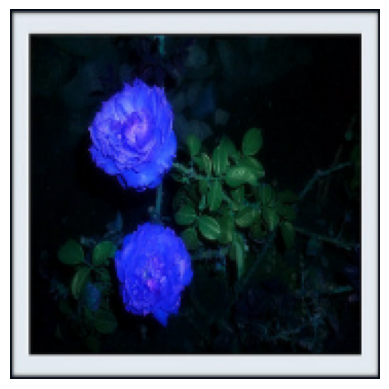

In [39]:
plt.axis('off')
plt.imshow(X[0])

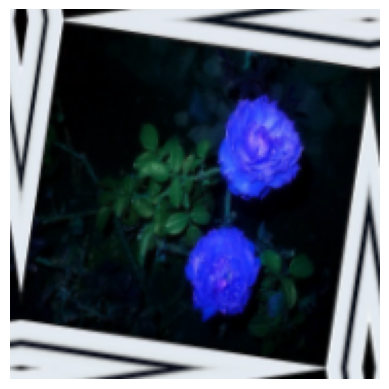

In [40]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [41]:

num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 7s 30ms/step - loss: 1.5366 - accuracy: 0.3205
Epoch 2/30
86/86 [==============================] - 3s 29ms/step - loss: 1.1619 - accuracy: 0.5283
Epoch 3/30
86/86 [==============================] - 2s 29ms/step - loss: 1.0366 - accuracy: 0.5919
Epoch 4/30
86/86 [==============================] - 3s 31ms/step - loss: 0.9349 - accuracy: 0.6330
Epoch 5/30
86/86 [==============================] - 3s 31ms/step - loss: 0.8911 - accuracy: 0.6512
Epoch 6/30
86/86 [==============================] - 2s 29ms/step - loss: 0.8494 - accuracy: 0.6639
Epoch 7/30
86/86 [==============================] - 2s 29ms/step - loss: 0.8249 - accuracy: 0.6737
Epoch 8/30
86/86 [==============================] - 2s 29ms/step - loss: 0.7732 - accuracy: 0.7039
Epoch 9/30
86/86 [==============================] - 3s 30ms/step - loss: 0.7432 - accuracy: 0.7151
Epoch 10/30
86/86 [==============================] - 3s 31ms/step - loss: 0.6958 - accuracy: 0.7347
Epoch 11/

In [42]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 1s 16ms/step - loss: 1.0846 - accuracy: 0.7124


[1.0846092700958252, 0.7124183177947998]